In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
from jupyterthemes import jtplot
jtplot.reset()

### LINEARITA PREAMPLIFICATORE - FIT LINEARE Vmax vs Qin

In [46]:
# READ DATA
file = '../Data/PreAmp/data_linearita.txt'

data = pd.read_csv(file, sep = '   ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['T', 'V']

R = 56564 # Ohm
S = 1.018 # Volt

data['T'] = data['T'] * 1e-6
data['Q'] = 1e12 * data['T'] * S / R 

data

,T,V,Q
1,0.000002,0.162,35.994626
2,0.000003,0.238,53.991938
3,0.000004,0.320,71.989251
4,0.000005,0.392,89.986564
5,0.000006,0.472,107.983877
6,0.000007,0.548,125.981189
7,0.000008,0.632,143.978502
8,0.000009,0.704,161.975815
9,0.000010,0.776,179.973128


In [32]:
# LINEAR FUCTION
def lin(x, a, b):
    return a + b * x

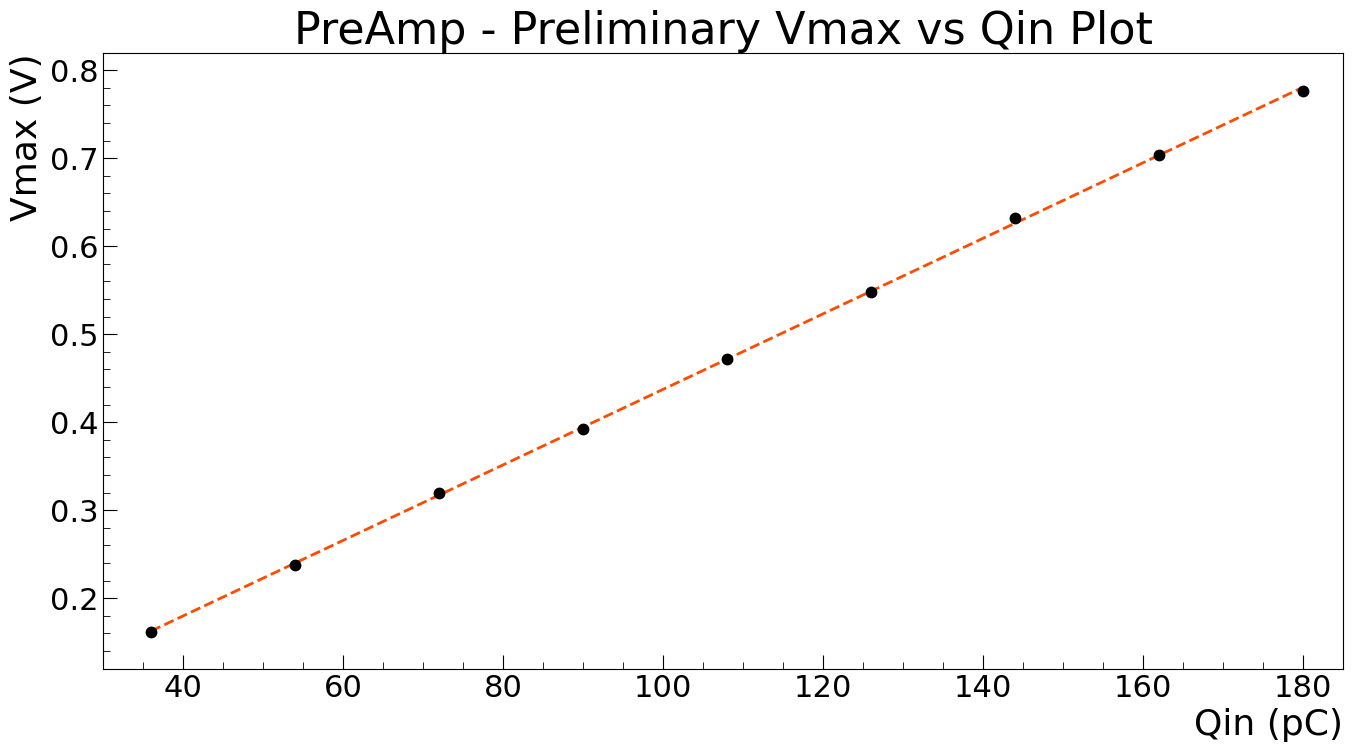

In [58]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data['Q'], ydata = data['V'])
func = lin(data['Q'], *par_lin)

# PLOT DATA
ax1.errorbar(data['Q'],data['V'], xerr = 0, yerr = 0, marker = '.', markersize = 15,
             elinewidth=0.5, color = '#000000', linewidth=0, capsize=2, label = 'Data')

# PLOT FIT FUNCTION
ax1.plot(data['Q'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

# PLOT TITLE
ax1.set_title('PreAmp - Preliminary Vmax vs Qin Plot', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('Qin (pC)', fontsize = 26, loc = 'right')
ax1.set_ylabel('Vmax (V)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
#ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#ax1.xaxis.get_offset_text().set_fontsize(22)
#ax1.ticklabel_format(axis = 'x', style = 'scientific', scilimits = (0, 0))

# PLOT RANGE
ax1.set_xlim(left = 30, right = 185)
ax1.set_ylim(bottom = .12, top = .82)

# SAVE FIGURE
fig.savefig('../Logbook/logbook_Vmax_Qin.png', dpi = 300)

plt.show()

### ARDUINO - TEMPO CARATTERISTICO

In [60]:
# READ DATA
file = '../Data/PreAmp/prova_fase_ROOT.dat'

data = pd.read_csv(file, sep = ' ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']
data

,time,ADC
1,1,795
2,2,793
3,3,793
4,4,798
5,5,795
...,...,...
2043,2043,793
2044,2044,776
2045,2045,787
2046,2046,788


In [ ]:
# EXPONENTIAL FUCTION
def expo(x, a, b, c):
    return a * np.exp(-b * x) + c

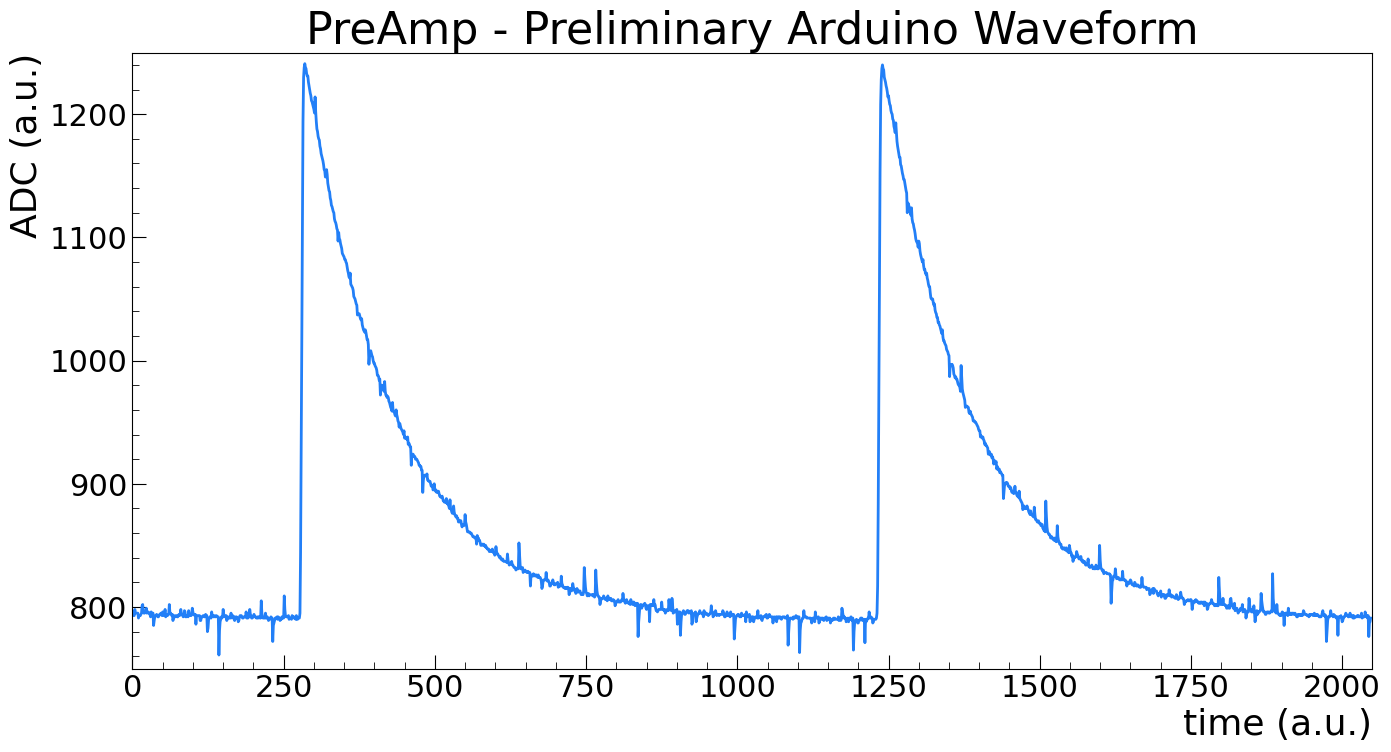

In [68]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time'], data['ADC'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Preliminary Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (a.u.)', fontsize = 26, loc = 'right')
ax1.set_ylabel('ADC (a.u.)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2050)
ax1.set_ylim(bottom = 750, top = 1250)

# SAVE FIGURE
fig.savefig('../Logbook/logbook_arduino_waveform.png', dpi = 300)

plt.show()

### RISPOSTA IN FREQUENZA - BODE PLOT

In [81]:
# READ DATA
file = '../Data/PreAmp/data_bode.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['f', 'Vin', 'Vout']

T = data['Vout'] / data['Vin']
data['T'] = T

data['f'] = np.log10(data['f'])
data['T'] = 20 * np.log10(data['T'])

data1 = data.iloc[:3, :]
data2 = data.iloc[6:, :]

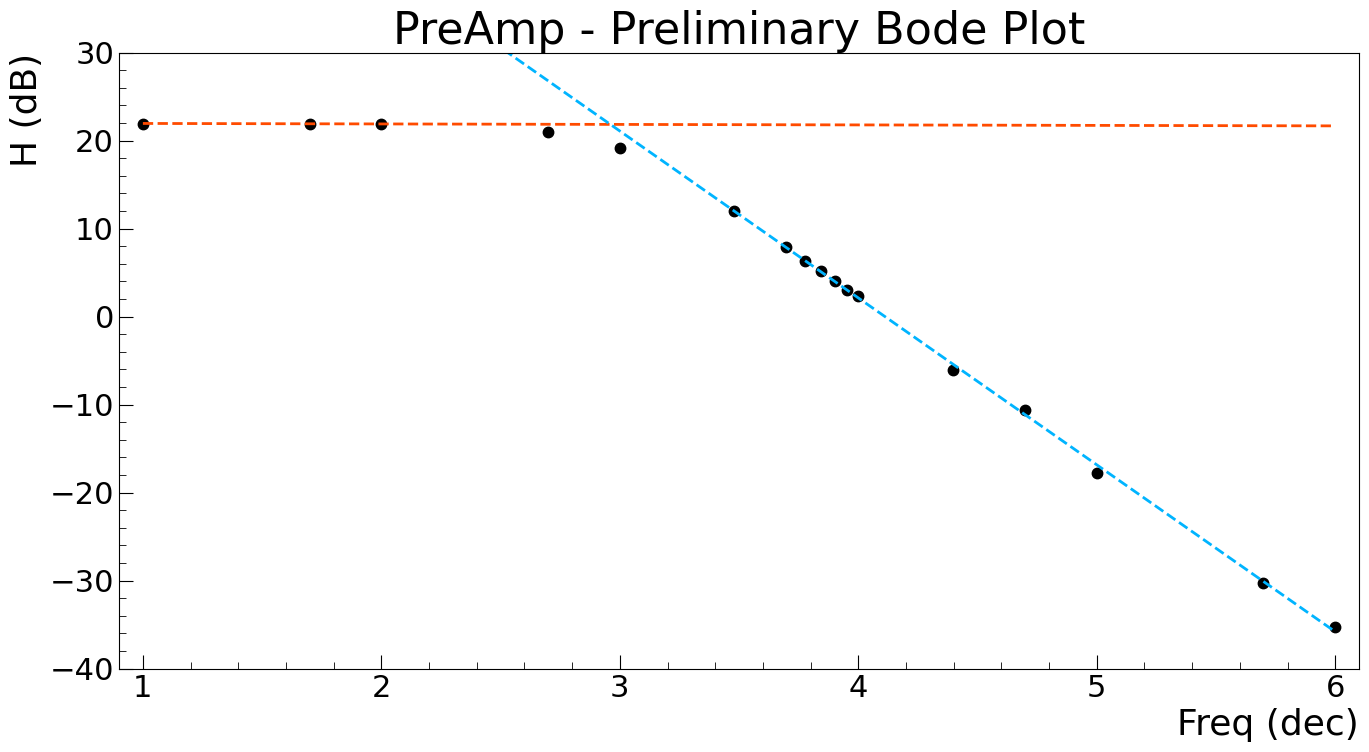

In [92]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FITS
par1, cov1 = curve_fit(f = lin, xdata = data1['f'], ydata = data1['T'], p0=[20, 0])
func1 = lin(data['f'], *par1)

par2, cov2 = curve_fit(f = lin, xdata = data2['f'], ydata = data2['T'])
func2 = lin(data['f'], *par2)

# PLOT DATA
ax1.plot(data['f'], data['T'], color = '#000000', linewidth = 0, marker = '.', markersize = 15, label = 'Data')

# PLOT FIT FUNCTIONS
ax1.plot(data['f'], func1, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit1')
ax1.plot(data['f'], func2, color = '#00b4ff', linewidth = 2, linestyle = 'dashed', label = 'Fit2')

# PLOT TITLE
ax1.set_title('PreAmp - Preliminary Bode Plot', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('Freq (dec)', fontsize = 26, loc = 'right')
ax1.set_ylabel('H (dB)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0.9, right = 6.1)
ax1.set_ylim(bottom = -40, top = 30)

# SAVE FIGURE
fig.savefig('../Logbook/logbook_bode.png', dpi = 300)

plt.show()